Sources:
https://www.geeksforgeeks.org/a-search-algorithm/

- Explain what the idea of this algorithm is
- Explain the general steps of this algorithm
- Say what the time complexity is 

### A* search algorithm steps:

1. 
2.
3.


Starting A* algorithm!
Found a path from B to E:  ['B', 'D', 'H', 'E']


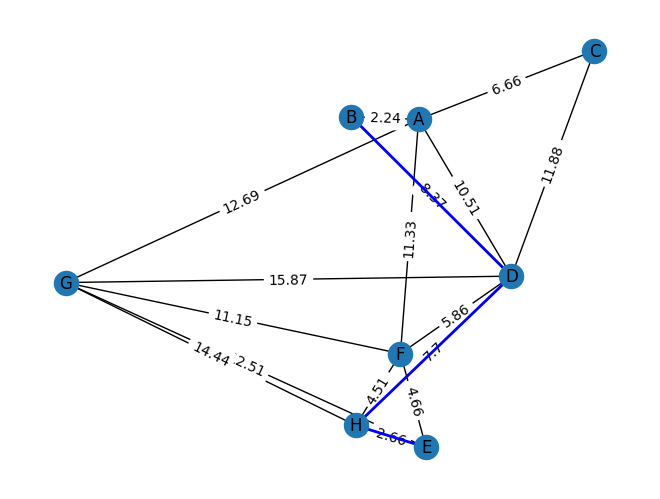

In [7]:
# code goes here!
from math import inf, sqrt
from heapq import heappop, heappush
from visualization import visualize_graph

# graph = {
#         'A': [('B', 10), ('C', 3)],
#         'C': [('D', 2)],
#         'D': [('E', 10)],
#         'E': [('A', 7)],
#         'B': [('C', 3), ('D', 2)]
#     }

class graph_vertex:
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

a = graph_vertex("A", 28.6448, 77.216721)
b = graph_vertex("B", 26.92207, 75.778885)
c = graph_vertex("C", 25.321684, 82.987289)
d = graph_vertex("D", 19.07283, 72.88261)
e = graph_vertex("E", 13.067439, 80.237617)
f = graph_vertex("F", 17.387140, 78.491684)
g = graph_vertex("G", 22.572645, 88.363892)
h = graph_vertex("H", 12.972442, 77.580643)

euclidean_graph = {
  a: set([(b, 2.243918), (c, 6.65902), (d, 10.507479), (f, 11.329626), (g, 12.693718)]),
  b: set([(d, 8.366539), (a, 2.243918)]),
  c: set([(a, 6.65902), (d, 11.88077)]),
  d: set([(a, 10.507479), (b, 8.366539), (c, 11.88077), (f, 5.856898), (g, 15.87195), (h, 7.699756)]),
  e: set([(g, 12.50541), (f, 4.659195), (h, 2.658671)]),
  f: set([(a, 11.329626), (d, 5.856898), (e, 4.659195), (h, 4.507721), (g, 11.151231)]),
  g: set([(a, 12.693718), (d, 15.87195), (e, 12.50541), (f, 11.151231), (h, 14.437532)]),
  h: set([(d, 7.699756), (e, 2.658671), (f, 4.507721), (g, 14.437532)])
}

# Euclidean Heuristic:
def heuristic(start, target):
 x_distance = abs(start.position[0] - target.position[0])
 y_distance = abs(start.position[1] - target.position[1])
 return sqrt(x_distance * x_distance + y_distance * y_distance)

def a_star(graph, start, target):
  print("Starting A* algorithm!")
  count = 0
  paths_and_distances = {}
  for vertex in graph:
    paths_and_distances[vertex] = [inf, [start.name]]
  
  paths_and_distances[start][0] = 0
  vertices_to_explore = [(0, start)]
  while vertices_to_explore and paths_and_distances[target][0] == inf:
    current_distance, current_vertex = heappop(vertices_to_explore)

    for neighbor, edge_weight in graph[current_vertex]:
      new_distance = current_distance + edge_weight + heuristic(neighbor, target)
      new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
      
      if new_distance < paths_and_distances[neighbor][0]:
        paths_and_distances[neighbor][0] = new_distance
        paths_and_distances[neighbor][1] = new_path
        heappush(vertices_to_explore, (new_distance, neighbor))
        count += 1
        
  print("Found a path from {0} to {1}: ".format(start.name, target.name, count), paths_and_distances[target][1])
  
  return paths_and_distances[target][1]

shortest_path = a_star(euclidean_graph, b, e)

# print(euclidean_graph)
# for key, connections in euclidean_graph.items():
#     for conn in connections:
#         print(f"{key.name} to {conn[0].name}: {conn[1]}")

def create_edge_dict(graph):
  edge_dict = {}
  for key, connections in graph.items():
    for conn in connections:
        edge_dict[(key.name, conn[0].name)] = conn[1]
            
  return edge_dict


graph_edge_dict = create_edge_dict(euclidean_graph)
# print(graph_edge_dict)


visualize_graph(graph_edge_dict, shortest_path)


## Time Complexity Breakdown

